In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from scipy import stats

__Data were collected from a sample of 10 Ice cream vendors located near college campuses.
    X is the size of the student population (in thousands) and Y is the quarterly sales 
    (in thousands of dollars).__

In [2]:
df1 = pd.read_excel('Irm.xlsx')
df1

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


# Checking for correlation between Sales and Student Population

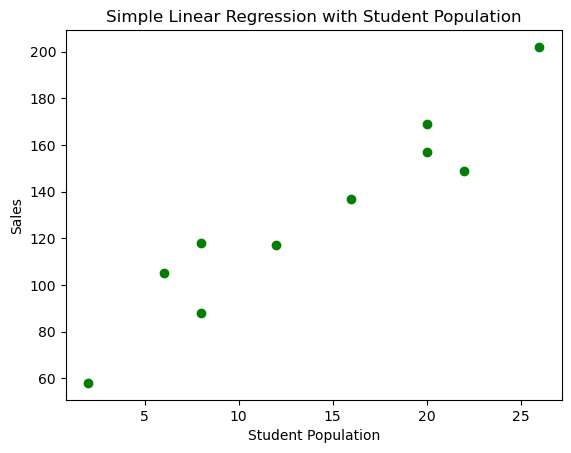

In [3]:
plt.scatter(df1['Student_Population'], df1['Sales'], color = 'green')
plt.ylabel('Sales')
plt.xlabel('Student Population')
plt.title('Simple Linear Regression with Student Population')
plt.show()

__Resilt: There is a positive correlation between Sales and Student Population.__

# Model Creation

In [4]:
Reg1 = ols(formula = "Sales ~ Student_Population", data = df1)
fit1 = Reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.55e-05
Time:                        15:03:28   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: Sales = 60 + 5xStudent_Population__ <br>
__Increasing the student population by one unit can lead to a fivefold increase in sales (1 unit = 1000 in our case).__

# Create ANOVA table

In [5]:
print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


__Result: <br> SST: 14200 + 1530 = 15730 <br>
    SSR: 14200 <br>
    SSE: 1530__

# Residual plot against x

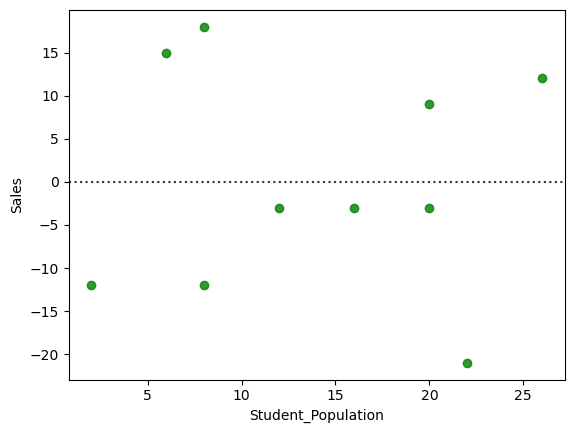

In [6]:
sns.residplot(df1, x = df1['Student_Population'], y = df1['Sales'], color = 'g')
plt.show()

__Result: There is no pattern in the Residual plot therefore the regression model is valid, and the relationship between the variables is accurately captured by the model.__

# Point Estimate

__Using the estimated regression equation 60 +5x, we see that for x = 10 (or 10 000 students),
60 + 5(10) = 110.<br>
Thus, a point estimate of the mean quarterly sales for all restaurants located near campuses with 10 000 students is $110 0000.__

# 95% Confidence Interval for the mean value of y for a given value of x

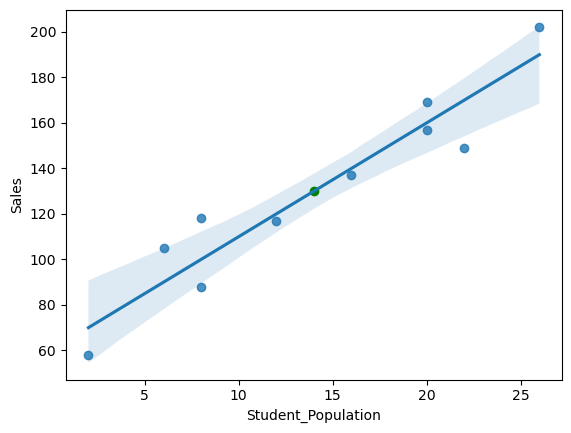

In [7]:
x = df1['Student_Population']
y = df1['Sales']
plt.figure()
sns.regplot(data = df1, x = x, y = y, fit_reg = True)
plt.scatter(np.mean(x), np.mean(y), color = 'green')
plt.show()

# 95% Prediction Interval for an individual y 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [11]:
import statsmodels.api as sm
sm_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(f"Intercept: {sm_model.params[0]:.2f}")
print(f"Slope: {sm_model.params[1:]}")
sm_pred = sm_model.get_prediction(sm.add_constant(X_test)).summary_frame(alpha=0.05)
sm_pred

Intercept: 72.02
Slope: Student_Population    4.637454
dtype: float64


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
8,174.046125,5.156726,160.790339,187.301912,145.793930,202.298321
2,109.121771,5.499244,94.985515,123.258028,80.445921,137.797622
0,81.297048,8.264653,60.052081,102.542015,48.527866,114.066230


__This output provides some additional outputs: <br>
◼️ mean: Prediction, same as y_pred from earlier. <br>
◼️ mean_ci_lower & mean_ci_upper: Confidence interval boundaries <br>
◼️ obs_ci_lower & obs_ci_upper: Prediction interval boundaries, same as lower and upper from earlier.__